<a href="https://colab.research.google.com/github/SeunD1/SeunD1/blob/main/Coursework_Set_Oluwaseun_B00862610_Worksheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**You will write your code in this worksheet**

**YOUR CODE WILL BE CHECKED FOR PLAGIARISM**

In [ ]:
# Importing my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Initial Setup**

1. First, you will setup your CoLab environment.

2. Then, you will authenticate a Google Drive client to download the file we will be processing in our Spark job.
Make sure to follow the interactive instructions.

3. Then, you will download the dataset `lastfm.csv` and store it in your drive.
Check the panel in your left to note if the dataset has downloaded correctly under the "Files" tab.

In [ ]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 41 kB/s 
     |████████████████████████████████| 199 kB 56.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=664b83e3bf16381c6666815473047c7123050e1cb83b1022af93680c892469c8
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jdk-headless openjdk-8-jre-headless
0 upg

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
file_list = drive.ListFile({'q': "'1iUsSO-Fo5D5c0YX9_6RgA1cy4IK_Da4-' in parents"}).GetList()
for f in file_list:
  print('title: %s, id: %s' % (f['title'], f['id']))

In [ ]:
id='1q7iH1KpSPEtd35NAOqvA35mikPhracDY'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('lastfm.csv')

***Check whether your dataset was downloaded and stored correctly***

## **From this point onwards, you are supposed to do the coding yourself. Refer the Exercise Sheet to carry out your analysis**

In [ ]:
# Importing the necessary modules related to PySpark
import pyspark
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf
from pyspark.ml.fpm import FPGrowth



In [ ]:
# create the session
conf = SparkConf().set("spark.ui.port", "4050")

# create the context
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()

In [ ]:
# Importing modules not related to PySpark
import pandas as pd # data processing, CSV file I/O (pd.read_csv)
import seaborn as sns #to explore and understand the visualization
import numpy as np # linear algebra
import matplotlib.pyplot as plt # to create visualization
%matplotlib inline



In [ ]:
spark

In [ ]:
# Reading the lastfm dataset as Spark DataFrame
lastfm = spark.read.csv('lastfm.csv',header = True, inferSchema= True)

In [ ]:
#  printing the schema for lastfm dataframe
print('What are the lastfm variable data types?')
print(lastfm.printSchema())

What are the lastfm variable data types?
root
 |-- user: integer (nullable = true)
 |-- artist: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- country: string (nullable = true)

None


In [ ]:
#  checking lastfm dataset
print('Show the first 10 rows')
print(lastfm.show(10))
print()

Show the first 10 rows
+----+--------------------+---+-------+
|user|              artist|sex|country|
+----+--------------------+---+-------+
|   1|red hot chili pep...|  f|Germany|
|   1|the black dahlia ...|  f|Germany|
|   1|           goldfrapp|  f|Germany|
|   1|    dropkick murphys|  f|Germany|
|   1|            le tigre|  f|Germany|
|   1|          schandmaul|  f|Germany|
|   1|               edguy|  f|Germany|
|   1|        jack johnson|  f|Germany|
|   1|           eluveitie|  f|Germany|
|   1|         the killers|  f|Germany|
+----+--------------------+---+-------+
only showing top 10 rows

None



In [ ]:
# number of columns
print('What are the columns header we have in lastfm dataset?')
print(lastfm.columns)

What are the columns header we have in lastfm dataset?
['user', 'artist', 'sex', 'country']


In [ ]:
#The number of observations (rows) in lastfm
print('How many observations do we have?')
print(lastfm.count())

How many observations do we have?
289955


In [ ]:
# Counts the number of distinct rows lastfm
print('The number of distinct rows we have?')
lastfm.distinct().count()

The number of distinct rows we have?


289953

Exploratory Data Analysis

In [ ]:
lastfm.describe().show()

+-------+------------------+--------------------+------+-----------+
|summary|              user|              artist|   sex|    country|
+-------+------------------+--------------------+------+-----------+
|  count|            289955|              289955|289955|     289955|
|   mean|  9852.46044731079|  178.03614457831324|  null|       null|
| stddev|5692.3550412356335|  133.76780367937877|  null|       null|
|    min|                 1|...and you will k...|     f|Afghanistan|
|    max|             19718|          Édith piaf|     m|   Zimbabwe|
+-------+------------------+--------------------+------+-----------+



In [ ]:
lastfm.createOrReplaceTempView('Table')
lastfm_artists = spark.sql("SELECT artist from Table")
lastfm_artists.show()

+--------------------+
|              artist|
+--------------------+
|red hot chili pep...|
|the black dahlia ...|
|           goldfrapp|
|    dropkick murphys|
|            le tigre|
|          schandmaul|
|               edguy|
|        jack johnson|
|           eluveitie|
|         the killers|
|        judas priest|
|          rob zombie|
|          john mayer|
|             the who|
|          guano apes|
|  the rolling stones|
|    devendra banhart|
|    boards of canada|
|           cocorosie|
|          aphex twin|
+--------------------+
only showing top 20 rows



In [ ]:
#getting the country with most users
country_grouping = lastfm.groupBy('country').agg(count('user'))
country_grouping = country_grouping.sort(col('count(user)').desc()).limit(20)
country_grouping.show()

+------------------+-----------+
|           country|count(user)|
+------------------+-----------+
|     United States|      59558|
|    United Kingdom|      27638|
|           Germany|      24251|
|            Poland|      17111|
|            Sweden|      12379|
|            Brazil|      11922|
|Russian Federation|      11676|
|           Finland|      10157|
|       Netherlands|       9673|
|             Spain|       9322|
|            Canada|       6928|
|         Australia|       6407|
|            France|       5962|
|             Italy|       5717|
|            Turkey|       4762|
|            Norway|       4641|
|            Mexico|       3803|
|    Czech Republic|       3752|
|           Belgium|       3331|
|          Portugal|       2882|
+------------------+-----------+



In [ ]:
#getting the artist with highest count
artist_grouping = lastfm.groupBy('artist').agg(count('user'))
artist_grouping = artist_grouping.sort(col('count(user)').desc()).limit(20)
artist_grouping.show()

+--------------------+-----------+
|              artist|count(user)|
+--------------------+-----------+
|           radiohead|       2704|
|         the beatles|       2668|
|            coldplay|       2378|
|red hot chili pep...|       1786|
|                muse|       1711|
|           metallica|       1670|
|          pink floyd|       1574|
|         the killers|       1473|
|         linkin park|       1473|
|             nirvana|       1473|
|    system of a down|       1365|
| death cab for cutie|       1220|
|        led zeppelin|       1188|
|               queen|       1166|
|             placebo|       1162|
|           daft punk|       1140|
|            the cure|       1139|
|      arctic monkeys|       1132|
|        depeche mode|       1132|
|         david bowie|       1105|
+--------------------+-----------+



In [ ]:
lastfmpd = lastfm.toPandas()
lastfmpd

,user,artist,sex,country
0,1,red hot chili peppers,f,Germany
1,1,the black dahlia murder,f,Germany
2,1,goldfrapp,f,Germany
3,1,dropkick murphys,f,Germany
4,1,le tigre,f,Germany
...,...,...,...,...
289950,19718,bob dylan,f,Canada
289951,19718,pixies,f,Canada
289952,19718,the clash,f,Canada
289953,19718,a tribe called quest,f,Canada


In [ ]:
# export the file
lastfmpd.to_csv('lastfmpd.csv', index = False)

In [ ]:
# To print a concise summary of lastfm DataFrame
lastfmpd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289955 entries, 0 to 289954
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user     289955 non-null  int32 
 1   artist   289955 non-null  object
 2   sex      289955 non-null  object
 3   country  289955 non-null  object
dtypes: int32(1), object(3)
memory usage: 7.7+ MB


In [ ]:
# pandas-profiling generates profile reports from a pandas DataFrame.
# The pandas df.describe() function is handy yet a little basic for exploratory data analysis. 
# pandas-profiling extends pandas DataFrame with df.profile_report(), which automatically generates a standardized univariate and multivariate report for data understanding.
# The report contains three additional sections: Overview, Alerts and Reproduction
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
import pandas_profiling
import pandas as np
from pandas_profiling import ProfileReport
pandas_profiling.ProfileReport(lastfmpd)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 22.0 MB 214 kB/s
     |████████████████████████████████| 102 kB 8.4 MB/s 
     |████████████████████████████████| 696 kB 57.7 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 9.9 MB 48.4 MB/s 
     |████████████████████████████████| 4.7 MB 39.0 MB/s 
     |████████████████████████████████| 296 kB 41.5 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-dev-py2.py3-none-any.whl size=324949 sha256=6cd340e3b59ebd082c3f41b4ee3b43d8883b5a70588c7afaf46ce29311453bd4
  Stored in directory: /tmp/pip-ephem-wheel-cache-75qe5jk1/wheels/64/b6/85/dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=b194126f19d88d3059f7e441f781deba01ace9245fad0e5fd476908046b74d4a
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

For creating visualization we need to do a value count of users listening to an artist and an aggregate of users per country

In [ ]:
print("User unique: ",len(lastfmpd.user.unique()))
print("Artist unique: ",len(lastfmpd.artist.unique()))
print("Country unique: ",len(lastfmpd.country.unique()))

User unique:  15000
Artist unique:  1004
Country unique:  159


In [ ]:
# how many times an artist was listened to by different users.
users_per_artist =lastfmpd.artist.value_counts()
users_per_artist.head()

radiohead                2704
the beatles              2668
coldplay                 2378
red hot chili peppers    1786
muse                     1711
Name: artist, dtype: int64

In [ ]:
# converting users_per_artist to dataframe
users_per_artist = pd.DataFrame(users_per_artist)
users_per_artist

,artist
radiohead,2704
the beatles,2668
coldplay,2378
red hot chili peppers,1786
muse,1711
...,...
böhse onkelz,99
schandmaul,98
toto,98
thin lizzy,96


In [ ]:
# resetting the index of a Data Frame
users_per_artist.reset_index(inplace=True)

In [ ]:
users_per_artist.head()

,index,artist
0,radiohead,2704
1,the beatles,2668
2,coldplay,2378
3,red hot chili peppers,1786
4,muse,1711


In [ ]:
users_per_artist.columns = ["artist", "count of users"]
users_per_artist.columns

Index(['artist', 'count of users'], dtype='object')

In [ ]:
users_per_artist.head()

,artist,count of users
0,radiohead,2704
1,the beatles,2668
2,coldplay,2378
3,red hot chili peppers,1786
4,muse,1711


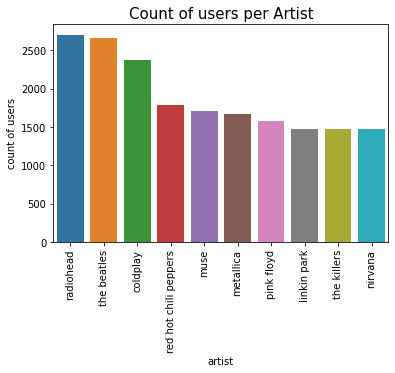

In [ ]:
# The graph of Count of Uers per Artist
sns.barplot(x='artist', y='count of users', data=users_per_artist.head(10))
plt.xticks(rotation='vertical')
plt.title("Count of users per Artist", fontsize=15)
plt.savefig("Users count to an artist.png")
plt.show()


In [ ]:
import plotly.express as px
stack_chart = px.bar(users_per_artist, x="artist", y="count of users", hover_data = ['count of users'], color='count of users', title = "Count of users per Artist")
stack_chart.show()

In [ ]:
users_country =lastfmpd.country.value_counts()
users_country.head()

United States     59558
United Kingdom    27638
Germany           24251
Poland            17111
Sweden            12379
Name: country, dtype: int64

In [ ]:
users_country = pd.DataFrame(users_country)
users_country

,country
United States,59558
United Kingdom,27638
Germany,24251
Poland,17111
Sweden,12379
...,...
Armenia,7
Tajikistan,7
Western Sahara,7
Bhutan,4


In [ ]:
users_country.reset_index(inplace=True)

In [ ]:
users_country.head()

,index,country
0,United States,59558
1,United Kingdom,27638
2,Germany,24251
3,Poland,17111
4,Sweden,12379


In [ ]:
users_country.columns = ["country", "count of users"]
users_country.columns

Index(['country', 'count of users'], dtype='object')

In [ ]:
users_country.head()

,country,count of users
0,United States,59558
1,United Kingdom,27638
2,Germany,24251
3,Poland,17111
4,Sweden,12379


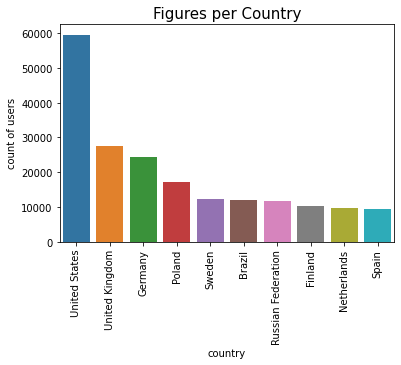

In [ ]:
# plt.figure(figsize=(50, 40))
# users_country.head(10).plot(kind="bar",x="country", y="count")
sns.barplot(x='country', y='count of users', data=users_country.head(10))
plt.xticks(rotation='vertical')
plt.title("Figures per Country", fontsize=15)
plt.savefig("Users count to a country.png")
plt.show()

In [ ]:
sexcount = lastfmpd.sex.value_counts()
sexcount

m    211823
f     78132
Name: sex, dtype: int64

In [ ]:
sexcount = pd.DataFrame(sexcount)
sexcount

,sex
m,211823
f,78132


In [ ]:
sexcount.reset_index(inplace=True)

In [ ]:
sexcount.columns = ["sex", "count"]
sexcount.columns

Index(['sex', 'count'], dtype='object')

In [ ]:
sexcount.head()

,sex,count
0,m,211823
1,f,78132


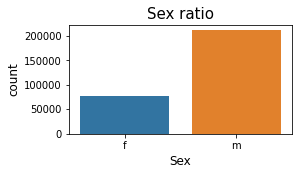

In [ ]:
plt.figure(figsize=(4,2))
sns.countplot(x='sex', data=lastfmpd)
plt.ylabel('count', fontsize=12)
plt.xlabel('Sex', fontsize=12)
plt.title("Sex ratio", fontsize=15)
plt.savefig("Sex ratio.png")
plt.show()

This function can create entire figures at once is referred to as Plotly Express imported in as px

In [ ]:
# treemap chart provides a hierarchical view of the data and makes it easy to spot patterns, such as which artist has the highest count
import plotly.express as px
fig = px.treemap(lastfmpd, path=['artist'], title='DataSet Treemap by Artist',
                 color_discrete_sequence=px.colors.qualitative.Pastel).update_traces(dict(marker_line_width=1,
          marker_line_color="black")).update_layout(paper_bgcolor='rgb(243, 243, 243)', plot_bgcolor='rgb(243, 243, 243)')
plt.savefig('fig.png') 
fig.show()


<Figure size 432x288 with 0 Axes>

In [ ]:
fig = px.treemap(lastfmpd, path=['sex','country'], title='DataSet Treemap by Sex & Country',
                 color_discrete_sequence=px.colors.qualitative.Pastel).update_traces(dict(marker_line_width=1,
          marker_line_color="black")).update_layout(paper_bgcolor='rgb(243, 243, 243)', plot_bgcolor='rgb(243, 243, 243)')
fig.show()

FP growth analysis

In [ ]:
# Dropping duplicates from the lastfm dataset
lastfmunique =lastfm.dropDuplicates()


In [ ]:
# grouping the users according the artists listened to on radio
grouped_user = lastfmunique.groupBy(['user']).agg({'artist': 'collect_list'}). toDF('user','artist')
grouped_user.show()

+----+--------------------+
|user|              artist|
+----+--------------------+
|   1|[eluveitie, the w...|
|   3|[pavement, mf doo...|
|   5|[dream theater, m...|
|   6|[muse, dream thea...|
|   9|[children of bodo...|
|  12|[ennio morricone,...|
|  13|[billie holiday, ...|
|  19|[bloc party, bob ...|
|  20|[architecture in ...|
|  22|[doves, kasabian,...|
|  28|[toto, blondie, p...|
|  31|[róisín murphy, j...|
|  34|[the doors, loree...|
|  35|[lamb, portishead...|
|  40|[interpol, metric...|
|  41|[radiohead, kreat...|
|  43|[the killers, dea...|
|  44|[pavement, elvis ...|
|  47|[tom waits, kate ...|
|  48|[disturbed, ramms...|
+----+--------------------+
only showing top 20 rows



In [ ]:
grouped_user.tail(5)

[Row(user=19710, artist=['nine inch nails', 'apoptygma berzerk', 'einstürzende neubauten', 'ladytron', 'vnv nation', 'combichrist', 'kmfdm', 'oomph!']),
 Row(user=19712, artist=['hans zimmer', 'madonna', 'vangelis', 'john williams', 'michael jackson', 'abba', 'roxette', 'phil collins', 'céline dion']),
 Row(user=19713, artist=['linkin park', 'armin van buuren', 'blank & jones', 'above & beyond', 'atb', 'ferry corsten', 'madonna', 'paul van dyk', 'chicane', 'tiësto', 'the prodigy', 'avril lavigne']),
 Row(user=19714, artist=['satyricon', 'arch enemy', 'children of bodom', 'led zeppelin', 'vader', 'red hot chili peppers', 'type o negative', 'misfits', 'deftones', 'burzum', 'slipknot', 'cannibal corpse']),
 Row(user=19717, artist=['kylie minogue', 'paramore', 'marilyn manson', 'gwen stefani', 'spice girls', 'beyoncé', 'the ting tings', 'hilary duff', 'madonna', 'pink', 't.a.t.u.', 'christina aguilera', 'miley cyrus', 'jennifer lopez', 'moby', 'katy perry'])]

In [ ]:
grouped_user.columns

['user', 'artist']

In [ ]:
grouped_user.take(5)

[Row(user=1, artist=['eluveitie', 'the who', 'edguy', 'jack johnson', 'le tigre', 'rob zombie', 'guano apes', 'goldfrapp', 'dropkick murphys', 'the rolling stones', 'judas priest', 'schandmaul', 'the black dahlia murder', 'john mayer', 'red hot chili peppers', 'the killers']),
 Row(user=3, artist=['pavement', 'mf doom', 'devendra banhart', 'broken social scene', 'm83', 'four tet', 'the flashbulb', 'animal collective', 'aesop rock', 'beastie boys', 'air', 'cocorosie', 'aphex twin', 'amon tobin', 'portishead', 'neutral milk hotel', 'sage francis', 'boards of canada', 'goldfrapp', 'radiohead', 'autechre', 'atmosphere', 'massive attack', 'plaid', 'joanna newsom', 'prefuse 73', 'arcade fire', 'max richter', 'the books']),
 Row(user=5, artist=['dream theater', 'megadeth', 'volbeat', 'iron maiden', 'children of bodom', 'sublime', 'nightwish', 'metallica', 'ac/dc', 'bob marley & the wailers', 'trivium']),
 Row(user=6, artist=['muse', 'dream theater', 'stevie wonder', 'u2', 'snow patrol', 'the 

We can split the dataset into training and testing


In [ ]:
# randon split can be used to split the grouped_user into train and test data. 80% of the data is used for training and 20% for testing
train, test = grouped_user.randomSplit(weights = [0.8,0.2], seed=200)
print(train.count())
print(test.count())

11954
3046


In [ ]:
# FP Growth algorithm is to find the frequent itemsets (artist) in the dataset and have a model trained by FPGrowth, which holds frequent itemset
fp_growth = FPGrowth(itemsCol="artist", minSupport= 0.01, minConfidence= 0.2)
model = fp_growth.fit(train) 

In [ ]:
# compute how many frequent itemsets and association rules after running FP-growth 
print(model.freqItemsets.count())
print(model.associationRules.count())

1666
1065


In [ ]:
print(model.associationRules.show())

+--------------------+--------------------+-------------------+------------------+--------------------+
|          antecedent|          consequent|         confidence|              lift|             support|
+--------------------+--------------------+-------------------+------------------+--------------------+
|[bloc party, radi...|          [coldplay]|0.44370860927152317| 2.798993517272711|0.011209636941609502|
|      [dire straits]|        [pink floyd]| 0.3853211009174312|3.6760801599097945| 0.01054040488539401|
|         [nightwish]|       [iron maiden]|0.22641509433962265|3.8174415200787717|0.014053873180525348|
|         [nightwish]|       [evanescence]|0.22776280323450135|  4.47808643069939|0.014137527187552283|
|         [nightwish]|         [rammstein]| 0.2695417789757412|3.8634321653189576|0.016730801405387317|
|         [nightwish]|         [metallica]| 0.3005390835579515|2.6931365853461413| 0.01865484356700686|
|         [nightwish]|       [linkin park]| 0.2223719676549865| 

In [ ]:
model.associationRules.toPandas()

,antecedent,consequent,confidence,lift,support
0,"[bloc party, radiohead]",[coldplay],0.443709,2.798994,0.011210
1,[dire straits],[pink floyd],0.385321,3.676080,0.010540
2,[nightwish],[iron maiden],0.226415,3.817442,0.014054
3,[nightwish],[evanescence],0.227763,4.478086,0.014138
4,[nightwish],[rammstein],0.269542,3.863432,0.016731
...,...,...,...,...,...
1060,[the kooks],[arctic monkeys],0.371728,4.899265,0.017818
1061,[the kooks],[the beatles],0.289703,1.628934,0.013887
1062,[the kooks],[bloc party],0.287958,4.297442,0.013803
1063,[the kooks],[red hot chili peppers],0.233857,1.985458,0.011210


In [ ]:
artist_recommend_toUser = model.transform(test)

In [ ]:
artist_recommend_toUser_toPd = artist_recommend_toUser.toPandas()
artist_recommend_toUser_toPd

,user,artist,prediction
0,9,"[children of bodom, pantera, in flames, gojira...","[metallica, nightwish, slipknot, rammstein, sy..."
1,64,"[ghostface, imogen heap, 30 seconds to mars, a...","[modest mouse, bloc party, the shins, the kill..."
2,103,"[slowdive, foo fighters, jimmy eat world, ac/d...","[the killers, coldplay, metallica, muse, linki..."
3,126,"[rammstein, cut copy, vnv nation, skinny puppy...","[metallica, system of a down, nightwish, the c..."
4,128,"[the stone roses, explosions in the sky, venet...","[belle and sebastian, the beatles, bob dylan, ..."
...,...,...,...
3041,19658,"[the cranberries, gwen stefani, alicia keys, j...","[jay-z, the beatles, iron maiden, system of a ..."
3042,19672,"[björk, the prodigy, cypress hill, portishead,...","[the chemical brothers, linkin park, red hot c..."
3043,19688,"[funeral for a friend, underworld, red hot chi...","[linkin park, coldplay, evanescence, the kille..."
3044,19693,"[the beatles, air, simon & garfunkel, serge ga...","[sonic youth, the smiths, the cure, the white ..."


In [ ]:
# recoomending different artists to a user based on the listening history
artist_recommend_toUser.take(5)

[Row(user=9, artist=['children of bodom', 'pantera', 'in flames', 'gojira', 'helloween', 'gamma ray', 'manowar', 'arch enemy', 'finntroll', 'strapping young lad', 'meshuggah', 'mastodon', 'devildriver', 'hammerfall', 'slayer', 'sabaton', 'hatebreed', 'kreator', 'iron maiden'], prediction=['metallica', 'nightwish', 'slipknot', 'rammstein', 'system of a down', 'megadeth', 'led zeppelin', 'ac/dc', 'pink floyd', 'judas priest', 'black sabbath']),
 Row(user=64, artist=['ghostface', 'imogen heap', '30 seconds to mars', 'apparat', 'trentemøller', 'death cab for cutie', 'underworld', 'placebo', 'alexisonfire', 'armin van buuren', 'drowning pool', 'chicane'], prediction=['modest mouse', 'bloc party', 'the shins', 'the killers', 'coldplay', 'the beatles', 'radiohead', 'sufjan stevens', 'linkin park', 'muse', 'nirvana', 'red hot chili peppers']),
 Row(user=103, artist=['slowdive', 'foo fighters', 'jimmy eat world', 'ac/dc', 'the smiths', 'minor threat', 'the hives', 'bad brains', 'turbonegro'], p

Alternatively, Apriori can used for mining the dataset

In [ ]:
# to determine the number of users that subscribe to an artist
User_sub_artist = []
for i in lastfmpd['user'].unique():
    User_sub_artist.append(list(lastfmpd[lastfmpd['user'] == i]['artist'].values))

In [ ]:
User_sub_artist[0:5]

[['red hot chili peppers',
  'the black dahlia murder',
  'goldfrapp',
  'dropkick murphys',
  'le tigre',
  'schandmaul',
  'edguy',
  'jack johnson',
  'eluveitie',
  'the killers',
  'judas priest',
  'rob zombie',
  'john mayer',
  'the who',
  'guano apes',
  'the rolling stones'],
 ['devendra banhart',
  'boards of canada',
  'cocorosie',
  'aphex twin',
  'animal collective',
  'atmosphere',
  'joanna newsom',
  'air',
  'portishead',
  'massive attack',
  'broken social scene',
  'arcade fire',
  'plaid',
  'prefuse 73',
  'm83',
  'the flashbulb',
  'pavement',
  'goldfrapp',
  'amon tobin',
  'sage francis',
  'four tet',
  'max richter',
  'autechre',
  'radiohead',
  'neutral milk hotel',
  'beastie boys',
  'aesop rock',
  'mf doom',
  'the books'],
 ['tv on the radio',
  'tool',
  'kyuss',
  'dj shadow',
  'air',
  'a tribe called quest',
  'the cinematic orchestra',
  'beck',
  'bon iver',
  'röyksopp',
  'bonobo',
  'the decemberists',
  'snow patrol',
  'battles',
  't

In [ ]:
# installing apyori
try:
    import apyori
except:
    !pip install apyori

from apyori import apriori
association_rules = apriori(User_sub_artist, min_support=0.03, min_confidence=0.4, min_lift=2)
association_results = list(association_rules)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5973 sha256=7a25805378dbedb88f91c200b160cf7e59b75a9f160bdef220ccc1ad260cd7d2
  Stored in directory: /root/.cache/pip/wheels/1b/02/6c/a45230be8603bd95c0a51cd2b289aefdd860c1a100eab73661
Successfully built apyori


In [ ]:

def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))


Apriori = pd.DataFrame(inspect(association_results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

Apriori['User_sub_artist']= Apriori['Left Hand Side']+"--"+Apriori['Right Hand Side']
Apriori.sort_values(by='Lift',inplace=True,ascending=False)

In [ ]:
Apriori

,Left Hand Side,Right Hand Side,Support,Confidence,Lift,User_sub_artist
3,led zeppelin,pink floyd,0.032000,0.404040,3.850449,led zeppelin--pink floyd
0,bob dylan,the beatles,0.034467,0.497115,2.794877,bob dylan--the beatles
5,sigur rós,radiohead,0.034200,0.492795,2.733702,sigur rós--radiohead
6,the rolling stones,the beatles,0.030467,0.484110,2.721759,the rolling stones--the beatles
1,the killers,coldplay,0.041067,0.418194,2.637894,the killers--coldplay
2,david bowie,the beatles,0.031733,0.430769,2.421866,david bowie--the beatles
4,led zeppelin,the beatles,0.033467,0.422559,2.375706,led zeppelin--the beatles
